# Lezione del 05 Dicembre 2017

In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

%matplotlib inline

## Load Dataset

In [2]:
# Load Dataset 'iris'
load_iris = datasets.load_iris()
X = load_iris.data
Y = load_iris.target
print('Dataset - First five row:\n {}'.format(X[:5]))
print('Target - First five row:\n {}'.format(Y[:5]))

Dataset - First five row:
 [[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
Target - First five row:
 [0 0 0 0 0]


In [3]:
# Split dataset
test_size = 0.33
seed = 11
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = seed)
print('X_train - First five row:\n {}'.format(X_train[:5]))
print('Y_train - First five row:\n {}'.format(Y_train[:5]))

X_train - First five row:
 [[ 6.8  3.2  5.9  2.3]
 [ 6.9  3.1  5.1  2.3]
 [ 5.9  3.   4.2  1.5]
 [ 4.9  2.5  4.5  1.7]
 [ 6.7  3.1  4.7  1.5]]
Y_train - First five row:
 [2 2 1 2 1]


In [4]:
# Model
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
accuracy = model.score(X_test, Y_test)
print('Score: {:0.4f}'.format(accuracy))

Score: 0.9200


## K Cross Validate

In [5]:
cross_validate = 30
result = cross_val_score(model, X, Y, cv= cross_validate)
print('Accuracy {:0.3f}% ({:0.3f}%)'.format(result.mean()*100.0, result.std()*100.0))

Accuracy 96.667% (6.667%)


## Leave One Out

In [6]:
loocv = LeaveOneOut()
result = cross_val_score(model, X, Y, cv = loocv)
print('Accuracy {:0.3f}% ({:0.3f}%)'.format(result.mean()*100.0, result.std()*100.0))
print('Length: {}'.format(len(result)))

Accuracy 95.333% (21.092%)
Length: 150


## Confusion Matrix

In [7]:
y_pred = model.predict(X_test)
confusion_matrix = confusion_matrix(Y_test, y_pred)
print('Confusion Matrix:\n{}'.format(confusion_matrix))

Confusion Matrix:
[[16  0  0]
 [ 0 14  2]
 [ 0  2 16]]


## Classification report

In [8]:
report = classification_report(Y_test, y_pred)
print('Report:\n {}'.format(report))

Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.88      0.88      0.88        16
          2       0.89      0.89      0.89        18

avg / total       0.92      0.92      0.92        50



## Compare Algoritms

LR: 0.953333 (0.060000)
LDA: 0.980000 (0.042687)
KNN: 0.966667 (0.044721)
CART: 0.960000 (0.044222)
NB: 0.953333 (0.042687)
SVM: 0.980000 (0.030551)


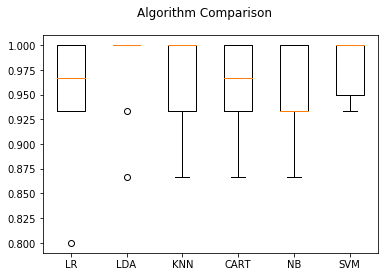

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    cv_results = cross_val_score(model, X, Y, cv=10, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Algorithm Turing

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

nns = np.array([1,2,3,4,6,7,8,9,10])
param_grid = dict(n_neighbors=nns)
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.n_neighbors)

0.98
3


In [11]:
from sklearn.ensemble import RandomForestClassifier
f_max_depth = np.array([15,20,25])
f_n_estimators=np.array([12,15,18,20])
f_max_features=np.array([1,2,3])

param_grid = dict(max_depth=f_max_depth, n_estimators=f_n_estimators, max_features=f_max_features)
model = RandomForestClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_)

0.973333333333
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [12]:
param_grid

{'max_depth': array([15, 20, 25]),
 'max_features': array([1, 2, 3]),
 'n_estimators': array([12, 15, 18, 20])}